# ✧ Problem Statement

<center><img src="https://img.freepik.com/free-vector/clothes-accessories-fashion-women-men-seasonal-outfits-clothes-footwear-bags-accessories-modern-casual-dress-vector-set-fashion-female-shirt-jacket-suit-skirt-illustration_102902-3415.jpg?w=2000" width=800></center>

Assume that we would like to create a clothing type classifier. You are required to select one of the freely available datasets and create an initial model to deliver a prototype of the solution. It’s recommended to use google colab for this task since it’s free and easily shareable. 

# ✧ Workflow

Project workflow will go as follows

1. **Data Acquisition;** through performing adequate search to find appropriate data for the given task.
2. **Data Preparation;** getting insights from our data through `investigation`, and `preprocessing` the data to be ready for training.
3. **Model Development;** running different models with different insights.
4. **Results Plotting;** plotting the training and validation loss.
5. **Model Tuning;** tuning our model by modifying hyperparamters and use data augmentation technique.
6. **Model Evaluation;** testing our model performance on unseen (`test`) data.

# ✧ Dataset Information

Dataset used for this project will be **[Clothing Dataset - By Alexey Grigorev](https://github.com/alexeygrigorev/clothing-dataset-small)**, as it offers many pros:
- Properly Variant among Classes.
- Multiple Classes (10 classes).
- Easily Accessible.
- Licensed under **CC0** (`Creative Common Zero`) License.


### **<font color="darkcyan"> Without any further ado let's dig in!**

In [1]:
# Importing libraries
import numpy as np                 # linear algebra 
import pandas as pd                # data Preprocessing
import matplotlib.pyplot as plt    # visualizations
import cv2                         # image processing 
import tensorflow as tf            # deep learning library
from tensorflow import keras       # built-on tensorflow

# 1) Data Acquistion
**`Importing data to the notebook`**

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 25.84 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [65]:
# Reading in data
train = keras.utils.image_dataset_from_directory('clothing-dataset-small/train',
                                                 batch_size=64, color_mode='grayscale')
validation = keras.utils.image_dataset_from_directory('clothing-dataset-small/validation',
                                                      batch_size=64, color_mode='grayscale')
test = keras.utils.image_dataset_from_directory('clothing-dataset-small/test',
                                                color_mode='grayscale')

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


---
##### <b><font color="forestgreen">Summary:</font></b>
1. Image data (~3800 image) is loaded on 3 variables:
  - **`train`**, containing the training data (~80%)
  - **`validation`**, containing the validation data (~10%)
  - **`test`**, containing the test data (~10%)
2. **Images are in grayscale format,** coloring have a small impact on the cloth class, (e.g: A dress is a dress! Whether it's blue, violet, gray, ..etc.) 

---

# 2) Data Preparation
**`Data Investigation, and preprocessing`**

In [66]:
class_names = train.class_names
print(class_names)

['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']


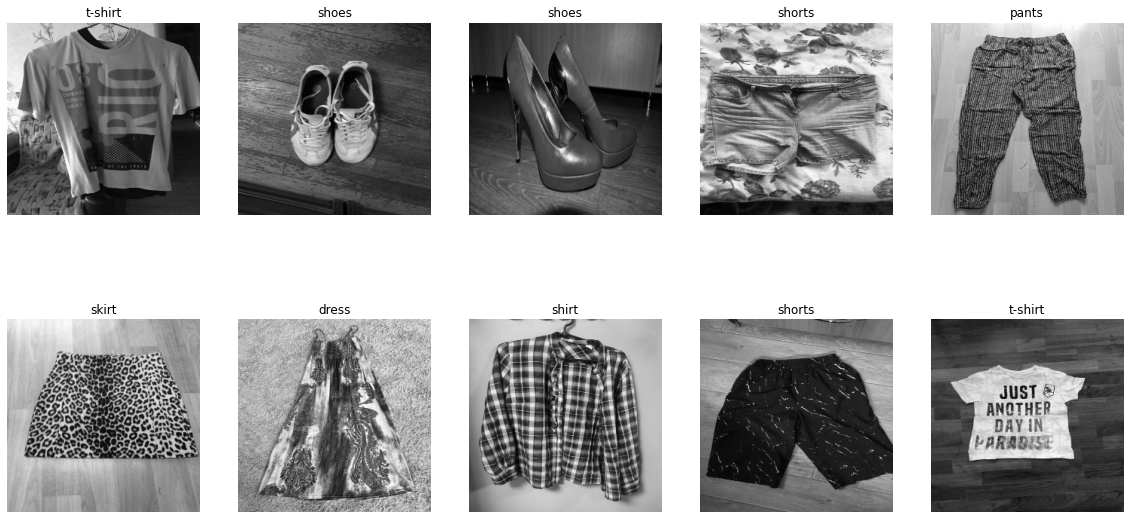

In [67]:
# Plotting samples from data
plt.figure(figsize=(20, 10))
for images, labels in train.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    # plt.imshow(images[i].numpy().astype("uint8"))
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    # plt.imshow(images[i])
    plt.title(str(class_names[labels[i]]))
    plt.axis("off")

---
##### <b><font color="forestgreen">Summary:</font></b> Our classes are clearly visible in grayformat
---

# 3) Model Development

In [68]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout, Input

In [82]:
def cnn_model(input_shape, k, start_filters=16, dropout_val=0):
  """Building standard cnn model (Input, Conv, Pool, B-Norm, ... , FC, Output)
          
          Parameters:
            input_shape   : Tuple, indicating the shape of the input data.
            k             : Int, indicating number of classes.
            start_filters : Starting number of filters. Default: 8.
            droput_val    : Float (0~1), rate of input units to drop. Default: 0.
          
          Returns
            model         : Conv layers followed by dense layers stacked.
  """
  # Building sequential model
  model = keras.Sequential([
            # First convolutional block
            Input(input_shape),
            Conv2D(filters=start_filters*1, kernel_size=3,
                    activation='relu', padding="valid"),
            MaxPooling2D(),
            BatchNormalization(),
        
            # Second convolutional block
            Conv2D(filters=start_filters*2, kernel_size=3,
                    activation='relu', padding="valid"),
            MaxPooling2D(),
            BatchNormalization(),
        
            # Third convolutional block
            Conv2D(filters=start_filters*4, kernel_size=3,
                    activation='relu', padding="valid"),
            MaxPooling2D(),
            BatchNormalization(),

            # Fourth convolutional block
            Conv2D(filters=start_filters*16, kernel_size=3,
                    activation='relu', padding="valid"),
            MaxPooling2D(),
            BatchNormalization(),

            # Fifth convolutional block
            Conv2D(filters=start_filters*32, kernel_size=3,
                    activation='relu', padding="valid"),
            MaxPooling2D(),
            BatchNormalization(),

            # Classifier head
            Flatten(),
            Dense(start_filters*16, activation='relu'),
            Dropout(dropout_val),
            Dense(start_filters*8, activation='relu'),
            Dropout(dropout_val),
            Dense(k, activation='softmax')
  ])
  return model

In [83]:
model = cnn_model(input_shape=(256, 256, 1), k=len(class_names),
                  start_filters=16, dropout_val=0.3)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_60 (Bat  (None, 127, 127, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                     

In [84]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
# Adding callbacks for improved learning
callbacks = [
             keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5,
                                               min_lr=0.000001, verbose=True),
             keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                           verbose=True)
]

In [86]:
# Training Model
results = model.fit(train, validation_data=validation,
                    epochs=100, callbacks=callbacks)

Epoch 1/100
48/48 [==============================] - 7s 121ms/step - loss: 4.1599 - accuracy: 0.2738 - val_loss: 3.9469 - val_accuracy: 0.2258 - lr: 0.0010
Epoch 2/100
48/48 [==============================] - 7s 130ms/step - loss: 2.3142 - accuracy: 0.3647 - val_loss: 1.8856 - val_accuracy: 0.3578 - lr: 0.0010
Epoch 3/100
48/48 [==============================] - 6s 116ms/step - loss: 1.7604 - accuracy: 0.4540 - val_loss: 1.5799 - val_accuracy: 0.4399 - lr: 0.0010
Epoch 4/100
48/48 [==============================] - 6s 115ms/step - loss: 1.4882 - accuracy: 0.5225 - val_loss: 1.3893 - val_accuracy: 0.5337 - lr: 0.0010
Epoch 5/100
48/48 [==============================] - 6s 115ms/step - loss: 1.2840 - accuracy: 0.5802 - val_loss: 1.2706 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 6/100
48/48 [==============================] - 8s 156ms/step - loss: 1.0883 - accuracy: 0.6359 - val_loss: 1.2295 - val_accuracy: 0.5865 - lr: 0.0010
Epoch 7/100
48/48 [==============================] - 7s 127ms/st

---
##### <b><font color="forestgreen">Summary:</font></b> Model can be easily tuned using `cnn_model()` arguments.

For parameters info check its **docstring** via **`cnn_model.__doc__`.**

---

# 4) Results Plotting
**`Plotting the training and validation loss`**

12/12 [==============================] - 1s 27ms/step - loss: 1.1611 - accuracy: 0.7500


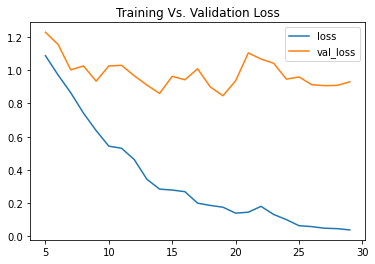

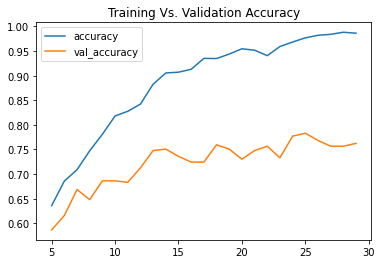

In [94]:
history = pd.DataFrame(results.history)
# history.head()
# Plotting starting from epoch 5
fig1 = history.loc[5:, ['loss', 'val_loss']].plot(title='Training Vs. Validation Loss')
fig2 = history.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Training Vs. Validation Accuracy")
model.evaluate(test)

# Uncomment to save plots
# fig1.figure.savefig('before_tuning_loss.png')
# fig2.figure.savefig('before_tuning_acc.png')

# 5) Model Tuning
**`Apply multiple tunings on model's hyperparameters, along with augmenting training data`**

In [88]:
from keras.preprocessing.image import ImageDataGenerator

In [100]:
datagen = ImageDataGenerator(
    zoom_range=0.15,
)

train_aug = datagen.flow_from_directory('clothing-dataset-small/train',
                                        batch_size=64, color_mode='grayscale')
validation_aug = datagen.flow_from_directory('clothing-dataset-small/validation',
                                              batch_size=64, color_mode='grayscale')

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [90]:
model_aug = cnn_model(input_shape=(256, 256, 1), k=train_aug.num_classes,
                  start_filters=16, dropout_val=0.2)
model_aug.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_65 (Bat  (None, 127, 127, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_66 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                     

In [91]:
model_aug.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
results_aug = model_aug.fit(train_aug, validation_data=validation_aug,
                            epochs=100, callbacks=callbacks)

Epoch 1/100
48/48 [==============================] - 29s 593ms/step - loss: 0.6955 - accuracy: 0.7669 - val_loss: 0.9237 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 2/100
48/48 [==============================] - 29s 596ms/step - loss: 0.6550 - accuracy: 0.7774 - val_loss: 1.1544 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 3/100
48/48 [==============================] - 28s 593ms/step - loss: 0.5829 - accuracy: 0.8012 - val_loss: 0.9140 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 4/100
48/48 [==============================] - 28s 592ms/step - loss: 0.5070 - accuracy: 0.8282 - val_loss: 0.8877 - val_accuracy: 0.7390 - lr: 0.0010
Epoch 5/100
48/48 [==============================] - 28s 586ms/step - loss: 0.4556 - accuracy: 0.8422 - val_loss: 1.0107 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 6/100
48/48 [==============================] - 28s 592ms/step - loss: 0.3977 - accuracy: 0.8667 - val_loss: 0.9310 - val_accuracy: 0.7185 - lr: 0.0010
Epoch 7/100
48/48 [==============================] - 28s 5

In [102]:
testgen = ImageDataGenerator()           # transforming to be ImageDataGenerator instance
test_aug = testgen.flow_from_directory('clothing-dataset-small/test',
                                        batch_size=64, color_mode='grayscale')

<class 'keras.preprocessing.image.DirectoryIterator'>


6/6 [==============================] - 2s 362ms/step - loss: 0.8413 - accuracy: 0.7796


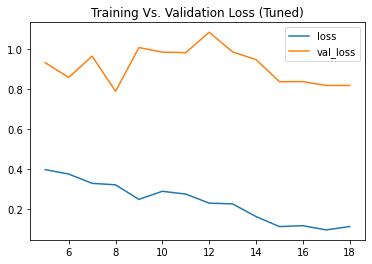

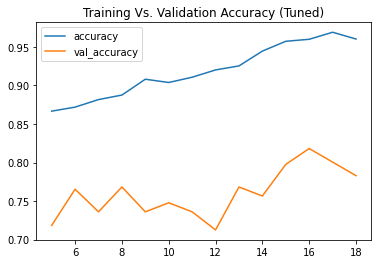

In [99]:
history_aug = pd.DataFrame(results_aug.history)
# history.head()
# Plotting starting from epoch 5
fig1 = history_aug.loc[5:, ['loss', 'val_loss']].plot(title="Training Vs. Validation Loss (Tuned)")
fig2 = history_aug.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Training Vs. Validation Accuracy (Tuned)") 
model_aug.evaluate(test_aug)

# Uncomment to save plots
fig1.figure.savefig('after_tuning_loss.png')
fig2.figure.savefig('after_tuning_acc.png')